In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [9]:
df = pd.read_csv('./Data/ramadan_energy_consumption.csv')
df.head(
)

,days,temperature,number_of_people,cooking_hours,high_temp_flag,energy_consumption
0,1,32.554260,8,2.995472,0,192.409582
1,2,34.112911,3,3.855221,0,221.939818
2,3,38.982644,9,3.668059,1,316.218875
3,4,28.443458,3,3.176701,0,183.986328
4,5,30.795791,6,2.902506,0,176.588589


In [10]:
X = df[['temperature','number_of_people','cooking_hours','high_temp_flag']]
y = df['energy_consumption']

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_

array([ 12.32258858,   8.71943093,  27.98019982, -35.20430132])

In [13]:
model.intercept_

-283.70398348429984

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


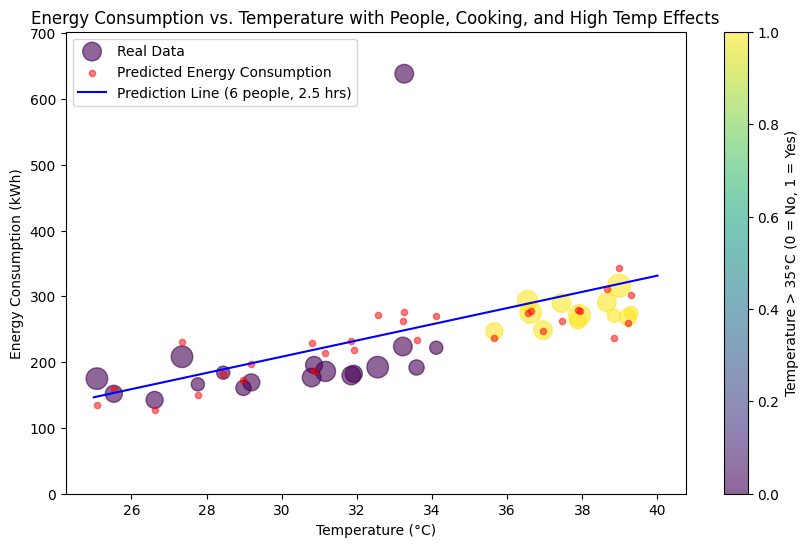

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["temperature"],
    df["energy_consumption"],
    c=df["high_temp_flag"],
    s=df["number_of_people"] * 30,
    alpha=0.6,
    cmap="viridis",
    label="Real Data"
)
plt.scatter(
    df["temperature"],
    model.predict(X),
    color="red",
    s=20,
    label="Predicted Energy Consumption",
    alpha=0.5
)
temperature_range = np.linspace(25, 40, 100)
X_line = np.array([temperature_range, np.full(100, 6), np.full(100, 2.5), np.zeros(100)]).T
plt.plot(temperature_range, model.predict(X_line), "b-", label="Prediction Line (6 people, 2.5 hrs)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs. Temperature with People, Cooking, and High Temp Effects")
plt.colorbar(scatter, label="Temperature > 35°C (0 = No, 1 = Yes)")
plt.legend()
plt.ylim(0, max(df["energy_consumption"]) * 1.1)
plt.show()